# LatticeMaze Demo

This notebook contains a tutorial for [LatticeMaze](../maze_transformer/generation/latticemaze.py), the central maze object in the maze_transformer library.

In [1]:
from maze_transformer.utils.notebook_utils import configure_notebook

import numpy as np
import matplotlib.pyplot as plt

from maze_transformer.generation.generators import LatticeMazeGenerators
from maze_transformer.evaluation.plot_maze import MazePlot

%matplotlib inline
configure_notebook(seed=42, dark_mode=True)

## Maze representation

The maze can be thought of as a grid of nodes, where an edge between nodes represents a path, and the lack of an edge represents a wall.

The following generates a 4x4 maze using depth-first search.

In [2]:
maze = LatticeMazeGenerators.gen_dfs(np.array([4,4]))

maze

LatticeMaze(lattice_dim=2, connection_list=array([[[ True,  True,  True, False],
        [ True,  True, False,  True],
        [ True, False, False,  True],
        [False, False, False, False]],

       [[ True, False,  True, False],
        [False, False,  True, False],
        [False,  True,  True, False],
        [ True, False,  True, False]]]), generation_meta={'func_name': 'gen_dfs', 'grid_shape': array([4, 4]), 'start_coord': (3, 1)})

### Connection List
In the above cell, we can see the canonical representation of the maze, the *connection list*.  To understand this representation, consider the following connection list for a 2x2 maze.
```
[
    [ # down
        [F T],
        [F F]
    ],
    [ # right
        [T F],
        [T F]
    ]
]
```

The two matrices in the connection list represent the *downward* and *rightward* connections, respectively. It tells us whether a given node has a connection in that direction.
```
down:  N  N     right:  N - N
          |           
       N  N             N - N
```

Note that the bottom row connections going down, and the right-hand column connections going right, will always be False.

We can superimpose the downward and rightward connections to visualize the maze:
```
N - N
    |
N - N
```

---

Using the same method, we can interpret the connection list for the original maze:


In [3]:
maze.connection_list

array([[[ True,  True,  True, False],
        [ True,  True, False,  True],
        [ True, False, False,  True],
        [False, False, False, False]],

       [[ True, False,  True, False],
        [False, False,  True, False],
        [False,  True,  True, False],
        [ True, False,  True, False]]])

```
N   N - N - N
|           |
N - N - N - N
            |
N - N   N - N
|       | 
N - N - N - N
```

### Adjacency list

Another common maze representation structure is an adjacency list, which is literally a list of every pair of adjacent nodes in the maze.

We can view the adjacency list representation of the graph using `LatticeMaze.as_adjlist`

In [4]:
for start, end in maze.as_adj_list():
    print(f"({start[0]}, {start[1]}) <--> ({end[0]}, {end[1]})")

(2, 2) <--> (2, 1)
(1, 0) <--> (2, 0)
(1, 2) <--> (1, 3)
(3, 3) <--> (3, 2)
(1, 1) <--> (0, 1)
(2, 1) <--> (1, 1)
(3, 0) <--> (3, 1)
(2, 3) <--> (3, 3)
(2, 3) <--> (1, 3)
(2, 0) <--> (3, 0)
(0, 2) <--> (1, 2)
(0, 2) <--> (0, 3)
(0, 0) <--> (1, 0)
(0, 0) <--> (0, 1)
(2, 3) <--> (2, 2)


## Plotting a maze

The `MazePlot` class bundles our plotting functionality.
We can use `.show()` to display the maze:

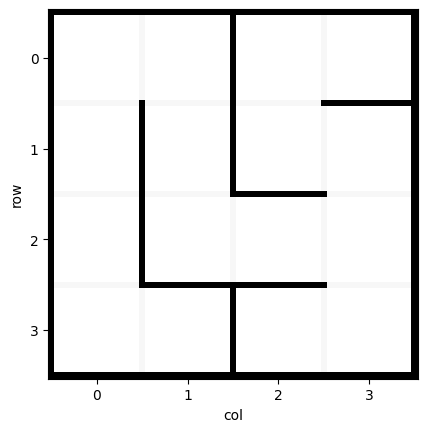

In [5]:
MazePlot(maze).plot()
plt.show()

Note that the adjacency list contains coordinates in `(row, column)` notation. This is the inverse of Cartesian Coordinates `(x, y)` with a horizontal x-axis.

## Solving the maze algorithmically

`LatticeMaze.find_shortest_path` uses the A* algorithm to find the optimal path through the maze.

In [6]:
true_path = maze.find_shortest_path(
    c_start=(0, 0),
    c_end=(3, 3)
)

print(f"{true_path =}")

true_path =[(0, 0), (0, 1), (1, 1), (2, 1), (2, 2), (2, 3), (3, 3)]


We can plot the shortest path with `.add_true_path()`.

{'p_transformed': array([[ 7.,  7.],
       [21.,  7.],
       [21., 21.],
       [21., 35.],
       [35., 35.],
       [49., 35.],
       [49., 49.]]), 'x_y': [(array([7., 7.]),), (array([21.,  7.]),), (array([21., 21.]),), (array([21., 35.]),), (array([35., 35.]),), (array([49., 35.]),), (array([49., 49.]),)], 'x': array([ 7., 21., 21., 21., 35., 49., 49.]), 'y': array([ 7.,  7., 21., 35., 35., 35., 49.]), 'fmt': '--', 'lw': 2.5, 'color': 'red', 'label': 'true path'}


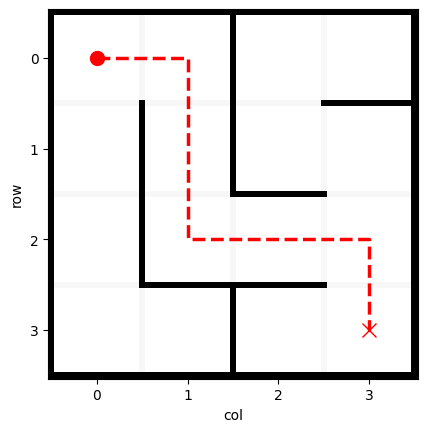

In [7]:
MazePlot(maze).add_true_path(true_path).plot()
plt.show()

## Other Plotting functionality

Displaying one or more predicted paths

{'p_transformed': array([[ 7.,  7.],
       [21.,  7.],
       [21., 21.],
       [21., 35.],
       [35., 35.],
       [49., 35.],
       [49., 49.]]), 'x_y': [(array([7., 7.]),), (array([21.,  7.]),), (array([21., 21.]),), (array([21., 35.]),), (array([35., 35.]),), (array([49., 35.]),), (array([49., 49.]),)], 'x': array([ 7., 21., 21., 21., 35., 49., 49.]), 'y': array([ 7.,  7., 21., 35., 35., 35., 49.]), 'fmt': '--', 'lw': 2.5, 'color': 'red', 'label': 'true path'}


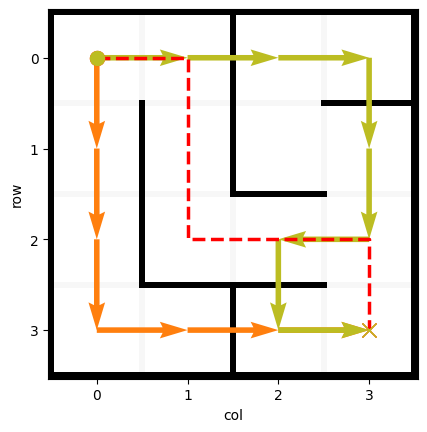

In [8]:
pred_path1 = [(0, 0), (1, 0), (2, 0), (3, 0), (3, 1), (3, 2), (3, 3)]
pred_path2 = [(0, 0), (0, 1), (0, 2), (0, 3), (1, 3), (2, 3), (2, 2), (3, 2), (3, 3)]
(
MazePlot(maze)
    .add_true_path(true_path)
    .add_predicted_path(pred_path1)
    .add_predicted_path(pred_path2)
    .plot()
)
plt.show()

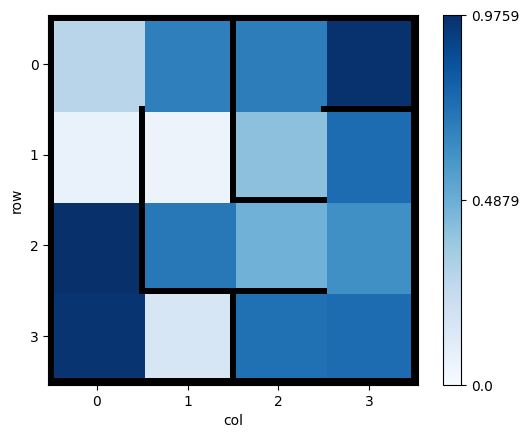

In [9]:
node_values = np.random.uniform(size=maze.grid_shape)

MazePlot(maze).add_node_values(node_values, color_map="Blues").plot()
plt.show()

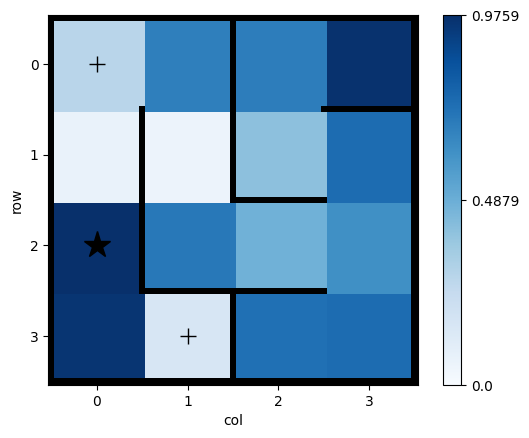

In [10]:
MazePlot(maze).add_node_values(
	node_values,
	color_map="Blues",
	target_token_coord= np.array([2, 0]),
	preceeding_tokens_coords = np.array([[0,0], [3,1]])
).plot()
plt.show()

Alternatively, plotting multiple paths at once is available. Paths must be of type `CoordArray` or `PathFormat`

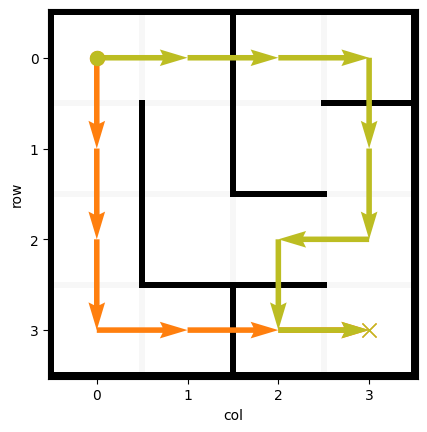

In [11]:
pred_paths = [pred_path1, pred_path2]
MazePlot(maze).add_multiple_paths(pred_paths).plot()
plt.show()

Plotting a maze as a string (e.g. for quick debugging via commandline)

In [12]:
ascii_maze = MazePlot(maze).as_ascii()
print(ascii_maze)

#########
#   #   #
# # # ###
# # #   #
# # ### #
# #     #
# ##### #
#   #   #
#########

